# 画像解析の基礎

## パッケージの読み込み

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cv2

## 平滑化

### オリジナル

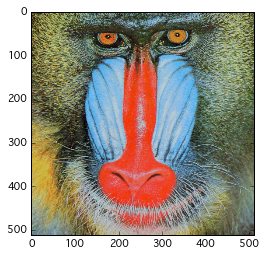

In [72]:
src = cv2.imread("./dataset/standard_test_images/mandril_color.tif", cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

### 単純平滑化
窓（ksize = (height, width)）の範囲内を平均化する．
例えば，ksize=(3,3)ならば以下のフィルタをすべての画素値（とその周辺）に適用する．
$$K = \frac{1}{9} \left(
\begin{array}{ccc}
 1 & 1 & 1 \\
 1 & 1 & 1 \\
 1 & 1 & 1 \\
\end{array}
\right)$$

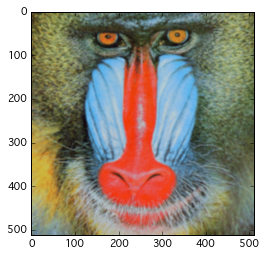

In [19]:
dstBlur = cv2.blur(src, ksize = (5,5))
plt.imshow(cv2.cvtColor(dstBlur, cv2.COLOR_BGR2RGB))

### ガウシアンフィルタ
ksizeは窓のサイズ．  
GaussianカーネルのパラメータsimgaX及びsigmaYを指定できる．

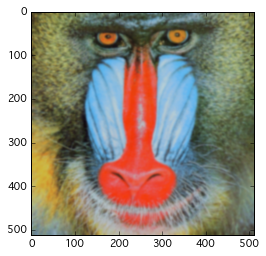

In [55]:
# sigmaXだけを設定するとsigmaYも同様の値と仮定する（等方的）
dstGaussian = cv2.GaussianBlur(src, ksize = (101,101), sigmaX=2)
plt.imshow(cv2.cvtColor(dstGaussian, cv2.COLOR_BGR2RGB))

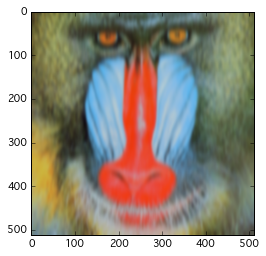

In [61]:
# 非等方的なフィルタ
dstGaussian = cv2.GaussianBlur(src, ksize = (101,101), sigmaX=2, sigmaY=6)
plt.imshow(cv2.cvtColor(dstGaussian, cv2.COLOR_BGR2RGB))

### バイラテラル平滑化
中央ピクセルからの輝度と空間的距離に基づき加重平均をとる（ガウシアンフィルタでは空間的距離だけに基づき加重平均を取る）．  
これによりエッヂの情報を保持する．

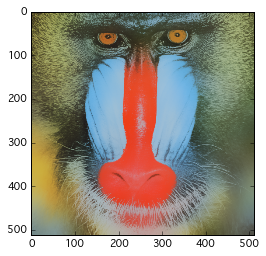

In [67]:
# sigmaXだけを設定するとsigmaYも同様の値と仮定する（等方的）
dstBilateral = cv2.bilateralFilter(src, d = 50, sigmaColor=100, sigmaSpace=25)
plt.imshow(cv2.cvtColor(dstBilateral, cv2.COLOR_BGR2RGB))

## 各種フィルタ

### Sobel微分

### Laplacian

### Cannyエッヂ検出器

In [ ]:
### Houg

## スケールスペース

### ガウシアンピラミッド

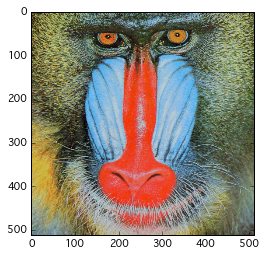

In [82]:
img = src.copy()
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

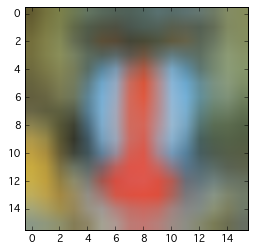

In [88]:
img = cv2.pyrDown(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### ラプラシアンピラミッド

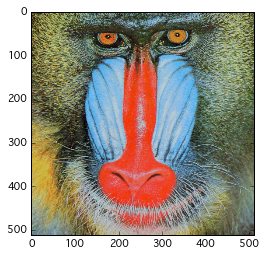

In [101]:
img = src.copy()
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

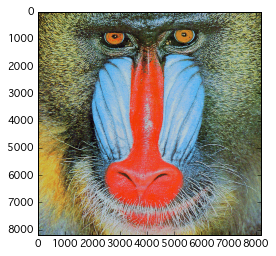

In [105]:
img = cv2.pyrUp(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 閾値処理
単純にはある基準に基づき画素値を0または1に置き換え，二値画像を作る操作．

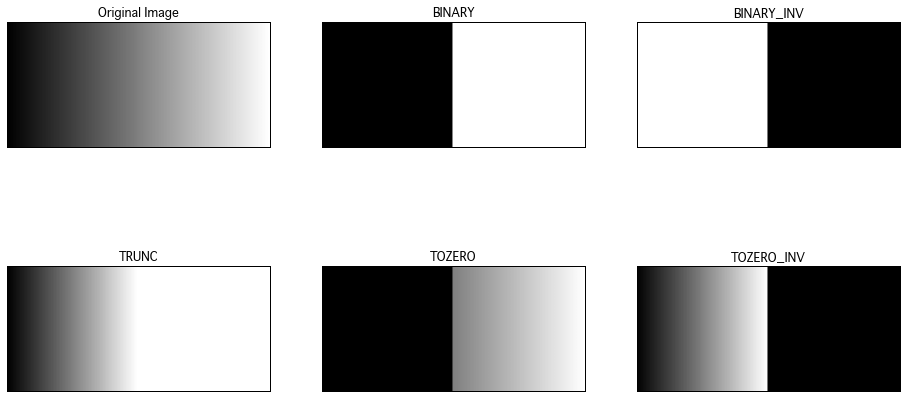

In [160]:
img = cv2.imread('./dataset/std/gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

ｐｌｔ.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### 大津の二値化
画素値のヒストグラムから閾値を決める．

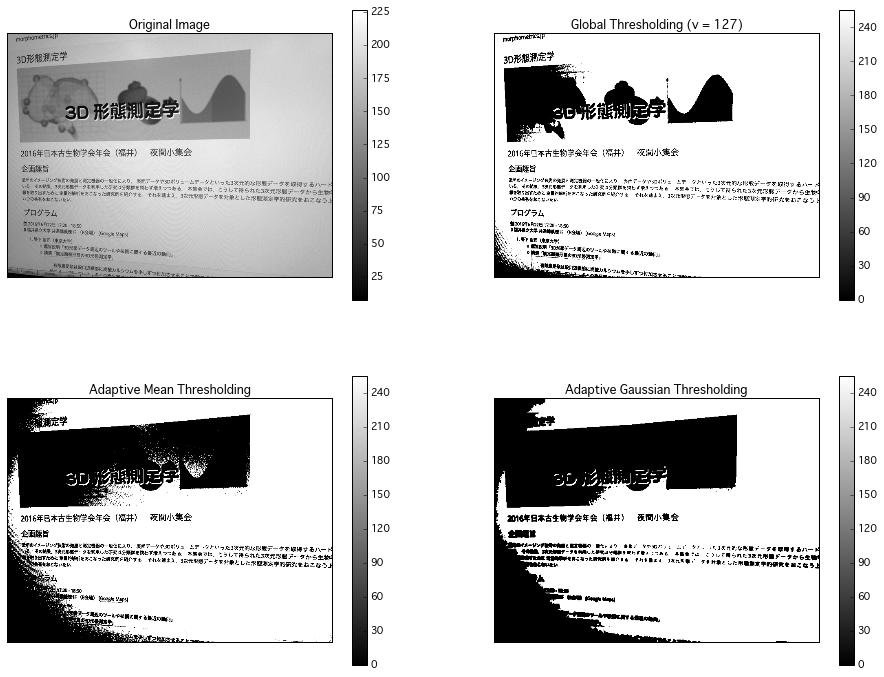

In [161]:
img = cv2.imread('./dataset/std/morphometrics.png',0)

ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
blur  = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

ｐｌｔ.figure(figsize=(16,12))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.colorbar(shrink=.95)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 適応的閾値
部分毎に基準を変更する閾値操作．

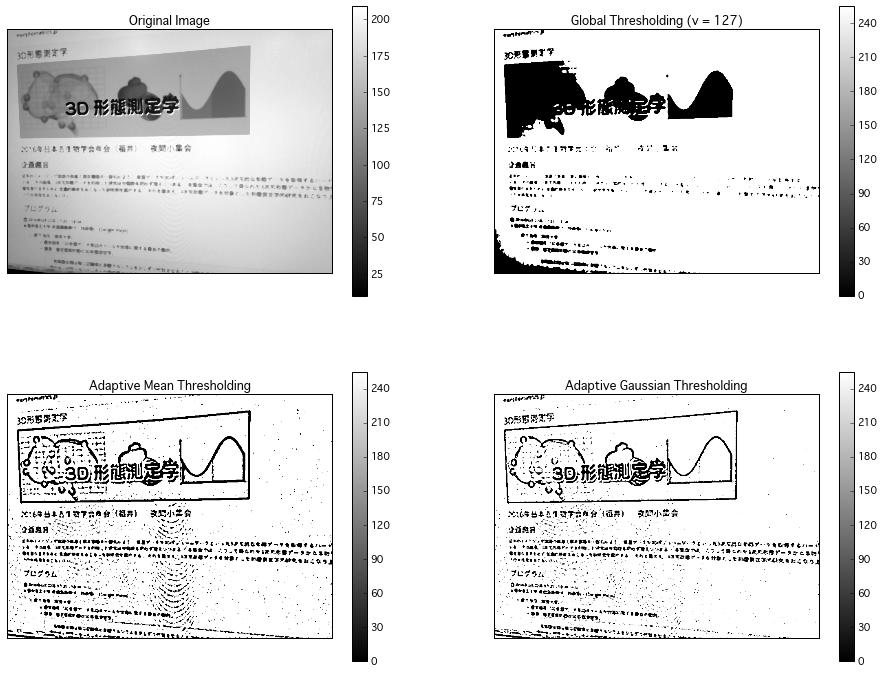

In [162]:
img = cv2.imread('./dataset/std/morphometrics.png',0)
img = cv2.medianBlur(img,5)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
th4 = cv2.

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

ｐｌｔ.figure(figsize=(16,12))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.colorbar(shrink=.95)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 距離変換
入力画像を最も近くにある0値のピクセル（背景）への距離を画素値に持った画像へ変換する操作．  

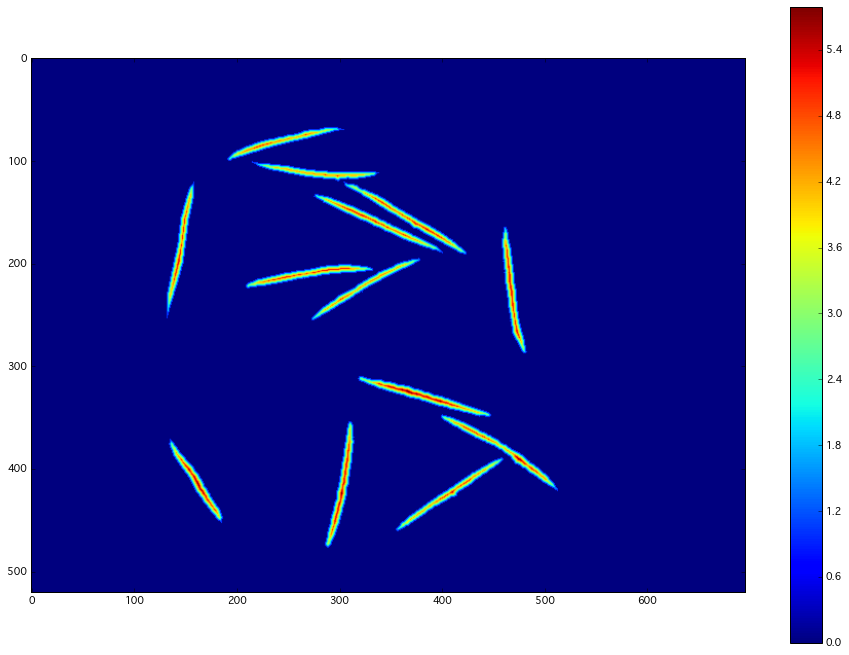

In [172]:
img = cv2.imread('./dataset/std/B18_binary.png',0)
dstDist = cv2.distanceTransform(img,cv2.DIST_L2,5)
ｐｌｔ.figure(figsize=(16,12))
plt.imshow(dstDist)
plt.colorbar(shrink=.95)

## 背景除去

## 領域分割とマスク

## 例